## Part 1

* Import necessary libs and get csv files through lib funcs

* Investigate data and find missing values 

In [39]:
import pandas as pd
import numpy as np

#df = pd.read_excel("online_retail_II.xlsx")

df_2009_2010 = pd.read_csv("Year 2009-2010.csv", encoding='latin1')
df_2010_2011 = pd.read_csv("Year 2010-2011.csv", encoding='latin1')


df_total = pd.concat([df_2009_2010, df_2010_2011], ignore_index=True)


#df = df_2009_2010
#df = df_2010_2011

df = df_total

print(df.isnull().sum())

print(df.info())

print(df.describe())

print(df.shape)


print(df.head(5))


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None
           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.46

* Firstly, clean data
* Make InvoiceDate data type date

In [40]:
import datetime as dt
df = df.dropna(subset=["Description", "Customer ID"])

#print(df.isnull().sum())

df["Sales"] = df["Quantity"] * df["Price"]

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

C:\Users\emir-\AppData\Local\Temp\ipykernel_29900\2961141117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales"] = df["Quantity"] * df["Price"]
C:\Users\emir-\AppData\Local\Temp\ipykernel_29900\2961141117.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


*Features that can be used*

InvoiceDate: It may be used to perform time series analysis. It is important to identify seasonal and time-based sales trends.

Quantity - Price: Quantity and Price combination may ensure total gain for each row

Recency: The number of days since the customer's last purchase.

AOV and Tenure: It may be useful



* Add 'Sales' column

* Create Recency feature through it.



In [41]:
customer_sales = df.groupby('Customer ID')['Sales'].sum().reset_index()
customer_freq = df.groupby('Customer ID')['Invoice'].count().reset_index()
customer_first_purchase = df.groupby('Customer ID')['InvoiceDate'].min().reset_index()


df["Recency"] = (df["InvoiceDate"].max() - df["InvoiceDate"]).dt.days
customer_recency = df.groupby('Customer ID')['Recency'].min().reset_index()


customer_details = pd.merge(customer_sales, customer_freq, on="Customer ID")
customer_details = pd.merge(customer_details, customer_recency, on="Customer ID")


customer_details['AOV'] = customer_details['Sales'] / customer_details['Invoice']


customer_first_purchase.columns = ['Customer ID', 'FirstPurchaseDate']
customer_first_purchase['Tenure'] = (df["InvoiceDate"].max() - customer_first_purchase['FirstPurchaseDate']).dt.days

customer_details = pd.merge(customer_details, customer_first_purchase[['Customer ID', 'Tenure']], on="Customer ID")


print(customer_details)



      Customer ID    Sales  Invoice  Recency        AOV  Tenure
0         12346.0   -64.68       48      325  -1.347500     725
1         12347.0  5633.32      253        1  22.266087     403
2         12348.0  2019.40       51       74  39.596078     437
3         12349.0  4404.54      180       18  24.469667     735
4         12350.0   334.40       17      309  19.670588     309
...           ...      ...      ...      ...        ...     ...
5937      18283.0  2736.65      986        3   2.775507     657
5938      18284.0   436.68       29      429  15.057931     431
5939      18285.0   427.00       12      660  35.583333     660
5940      18286.0  1188.43       70      476  16.977571     723
5941      18287.0  4177.89      156       42  26.781346     737

[5942 rows x 6 columns]


C:\Users\emir-\AppData\Local\Temp\ipykernel_29900\2856439051.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Recency"] = (df["InvoiceDate"].max() - df["InvoiceDate"]).dt.days


A little visualiziton

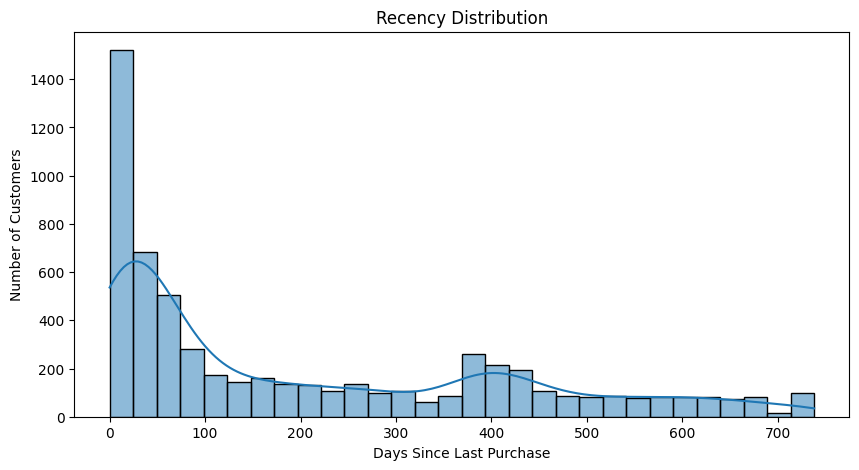

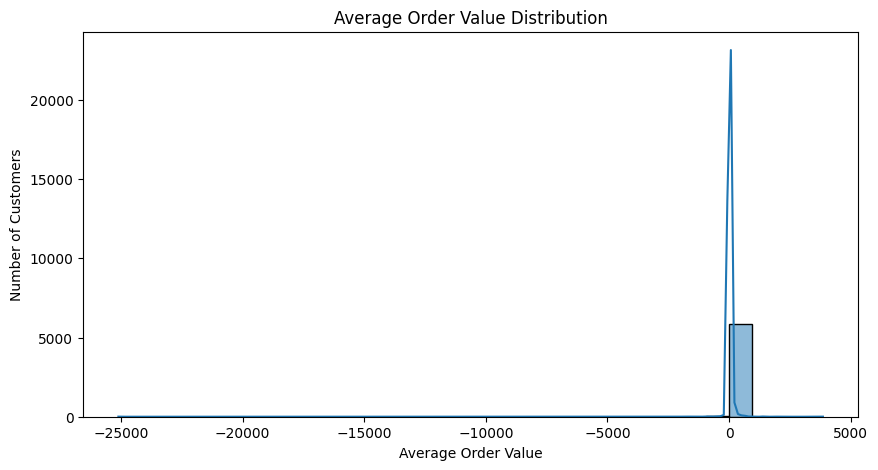

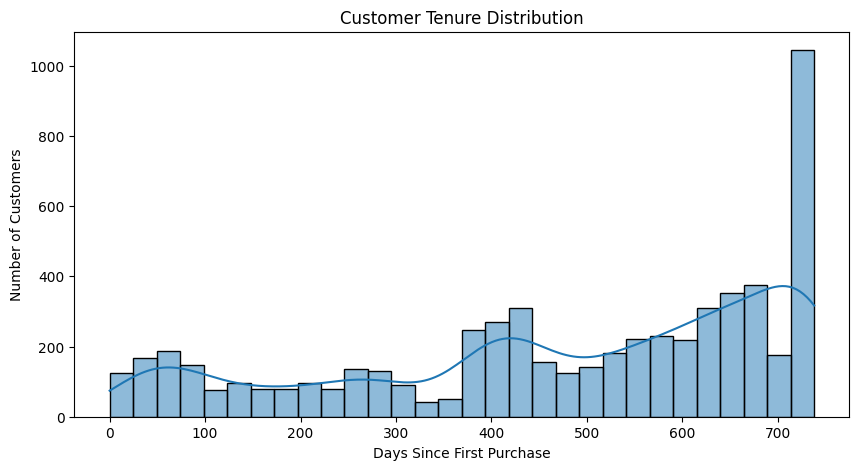

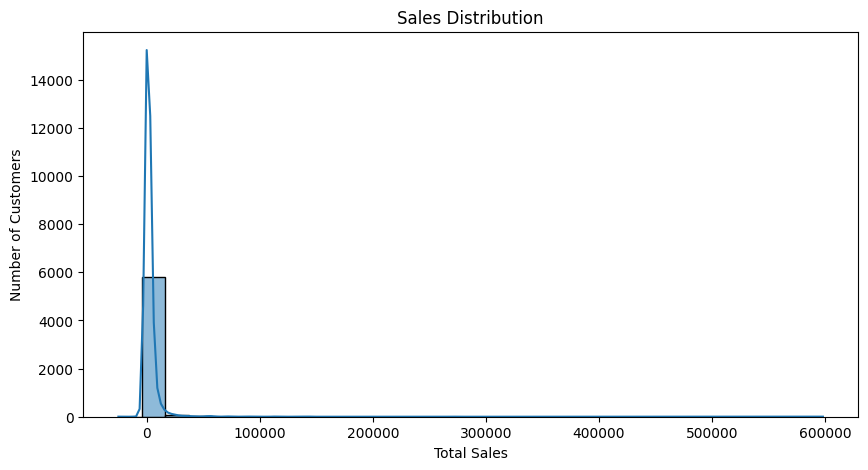

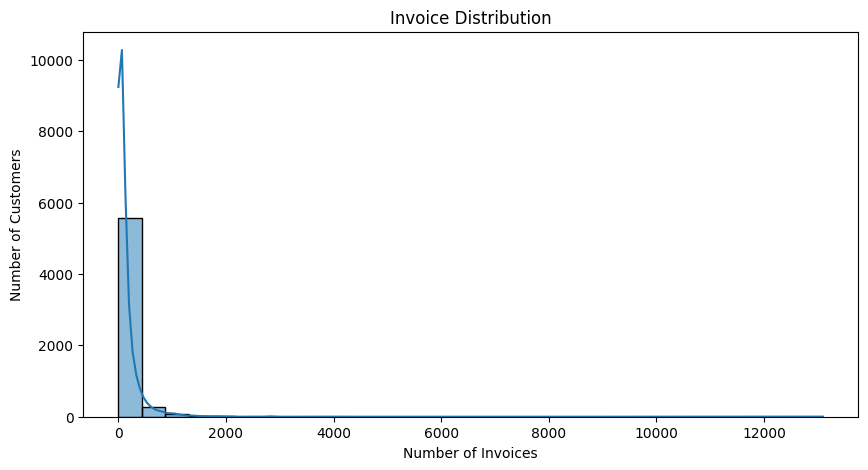

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recency distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_details['Recency'], kde=True, bins=30)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

# Average Order Value distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_details['AOV'], kde=True, bins=30)
plt.title('Average Order Value Distribution')
plt.xlabel('Average Order Value')
plt.ylabel('Number of Customers')
plt.show()

# Tenure distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_details['Tenure'], kde=True, bins=30)
plt.title('Customer Tenure Distribution')
plt.xlabel('Days Since First Purchase')
plt.ylabel('Number of Customers')
plt.show()

# Sales distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_details['Sales'], kde=True, bins=30)
plt.title('Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Number of Customers')
plt.show()

# Invoice distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_details['Invoice'], kde=True, bins=30)
plt.title('Invoice Distribution')
plt.xlabel('Number of Invoices')
plt.ylabel('Number of Customers')
plt.show()





## Part 2

* Kmeans clustering algorith is a suitable method to clustering customers

* Before starting, removing outliers and scaling features is a obligation

	While removing outliers I used iqr, but Z-score also could be used

In [43]:
z = customer_details.Sales.quantile(0.05)
y = customer_details.Sales.quantile(0.95)

iqr = y - z

customer_details = customer_details[(customer_details.Sales >= z - 1.5*iqr) & (customer_details.Sales <= y + 1.5*iqr)]


q1 = customer_details.Invoice.quantile(0.05)
q3 = customer_details.Invoice.quantile(0.95)
iqr = q3 - q1
customer_details = customer_details[(customer_details.Invoice >= q1 - 1.5*iqr) & (customer_details.Invoice <= q3 + 1.5*iqr)]

q1 = customer_details.Recency.quantile(0.05)
q3 = customer_details.Recency.quantile(0.95)
iqr = q3 - q1
customer_details = customer_details[(customer_details.Recency >= q1 - 1.5*iqr) & (customer_details.Recency <= q3 + 1.5*iqr)]

q1 = customer_details.AOV.quantile(0.05)
q3 = customer_details.AOV.quantile(0.95)
iqr = q3 - q1
customer_details = customer_details[(customer_details.AOV >= q1 - 1.5*iqr) & (customer_details.AOV <= q3 + 1.5*iqr)]

q1 = customer_details.Tenure.quantile(0.05)
q3 = customer_details.Tenure.quantile(0.95)
iqr = q3 - q1
customer_details = customer_details[(customer_details.Tenure >= q1 - 1.5*iqr) & (customer_details.Tenure <= q3 + 1.5*iqr)]

print(customer_details)



      Customer ID    Sales  Invoice  Recency        AOV  Tenure
0         12346.0   -64.68       48      325  -1.347500     725
1         12347.0  5633.32      253        1  22.266087     403
2         12348.0  2019.40       51       74  39.596078     437
3         12349.0  4404.54      180       18  24.469667     735
4         12350.0   334.40       17      309  19.670588     309
...           ...      ...      ...      ...        ...     ...
5937      18283.0  2736.65      986        3   2.775507     657
5938      18284.0   436.68       29      429  15.057931     431
5939      18285.0   427.00       12      660  35.583333     660
5940      18286.0  1188.43       70      476  16.977571     723
5941      18287.0  4177.89      156       42  26.781346     737

[5693 rows x 6 columns]


* Now scale it with StandardScaler

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

customer_details_scaled = scaler.fit_transform(customer_details[['Sales', 'Invoice', 'Recency', 'AOV', 'Tenure']])

customer_details_scaled = pd.DataFrame(customer_details_scaled, columns=['Sales', 'Invoice', 'Recency', 'AOV', 'Tenure'])

print(customer_details_scaled)

         Sales   Invoice   Recency       AOV    Tenure
0    -0.680974 -0.420418  0.579649 -1.095772  1.120185
1     1.377809  0.865887 -0.955087  0.119481 -0.318573
2     0.072039 -0.401594 -0.609298  1.011354 -0.166654
3     0.933830  0.407837 -0.874561  0.232886  1.164867
4    -0.536780 -0.614932  0.503860 -0.014094 -0.738583
...        ...       ...       ...       ...       ...
5688  0.331193  5.465212 -0.945613 -0.883585  0.816348
5689 -0.499825 -0.539636  1.072281 -0.251481 -0.193463
5690 -0.503322 -0.646305  2.166491  0.804842  0.829753
5691 -0.228205 -0.282375  1.294912 -0.152688  1.111249
5692  0.851938  0.257246 -0.760877  0.351855  1.173804

[5693 rows x 5 columns]


* Now apply K-Means Clustering

	Determine optimal number of clusters with using elbow method

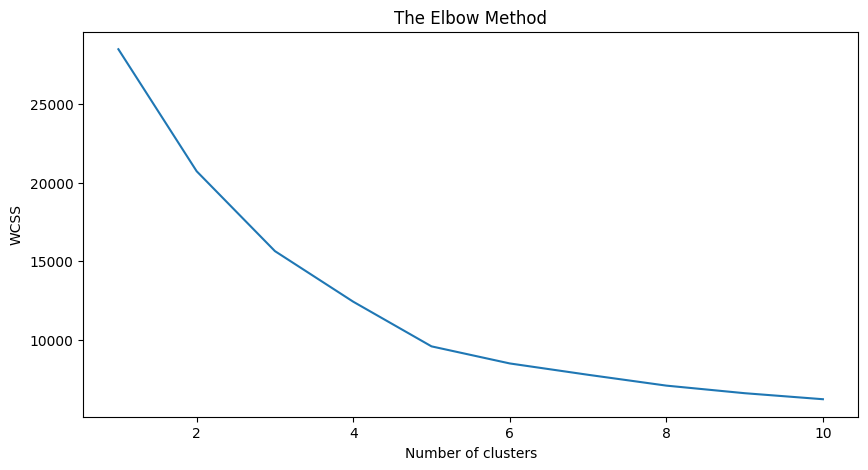

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(customer_details_scaled)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* For optimal value = 5

In [46]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
customer_details['Cluster'] = kmeans.fit_predict(customer_details_scaled)	

* Visualize clusters and print centers

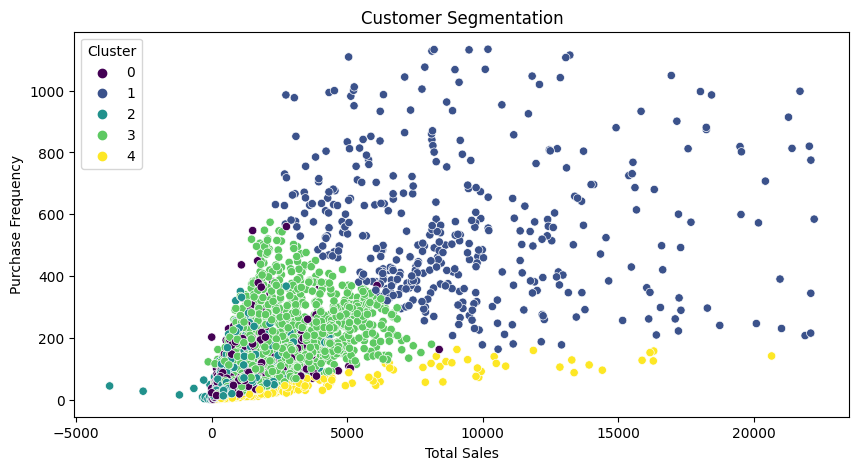

[[-0.39153569 -0.38434308 -0.56568444 -0.15009242 -1.29500037]
 [ 2.70600349  2.76031683 -0.80301976  0.03264091  0.83811336]
 [-0.46539524 -0.45869407  1.29904767 -0.25537728  0.4145179 ]
 [ 0.18166988  0.28314704 -0.60759953 -0.13718086  0.61179928]
 [ 0.30512208 -0.5240576   0.13113768  3.46083375  0.14413339]]


In [47]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=customer_details, x='Sales', y='Invoice', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Sales')
plt.ylabel('Purchase Frequency')
plt.show()

print(kmeans.cluster_centers_)

* Analyze clusters

          Customer ID        Sales     Invoice     Recency        AOV  \
Cluster                                                                 
0        15236.825261   736.386353   53.749234   83.207235  17.028005   
1        15168.487113  9309.301606  554.917526   33.103093  20.578696   
2        15378.663366   531.968696   41.899825  476.873034  14.982214   
3        15365.997052  2322.820759  160.127948   74.358491  17.278889   
4        15216.659004  2664.493682   31.482759  230.314176  87.191914   

             Tenure  
Cluster              
0        184.471490  
1        661.871134  
2        567.068725  
3        611.221108  
4        506.555556  


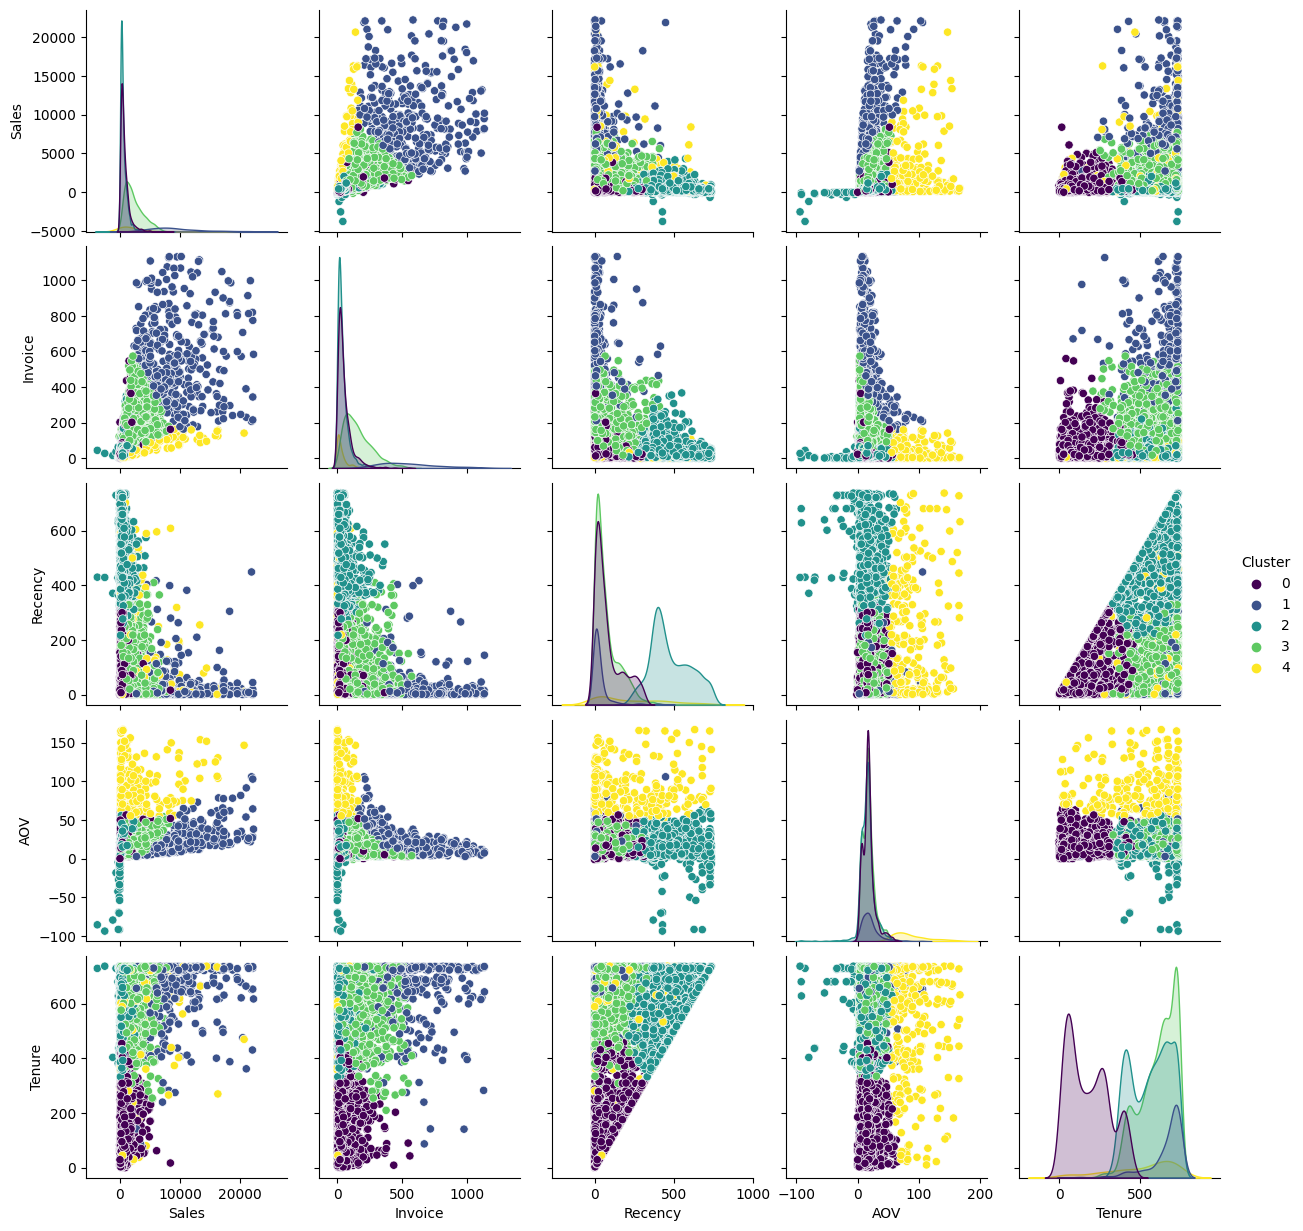

In [48]:
customer_details['Cluster'] = kmeans.labels_

cluster_summary = customer_details.groupby('Cluster').mean()
print(cluster_summary)

sns.pairplot(customer_details, hue='Cluster', vars=['Sales', 'Invoice', 'Recency', 'AOV', 'Tenure'], palette='viridis')
plt.show()

* Boxplot

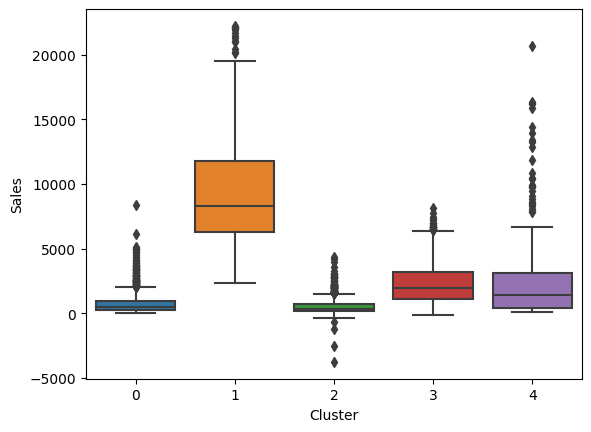

In [49]:
import seaborn as sns

sns.boxplot(x='Cluster', y='Sales', data=customer_details)
plt.show()

* Check silhouette score

	score = 0.375 

	0.5 < score --> Good
	
	0 > score --> Poor 

In [50]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(customer_details_scaled, kmeans.labels_)
print(silhouette_score)

0.375567402302268


*Note*

Country feature also can be used, but most of customers' country United Kingdom. Thus there will cause no specific change.
If country encoding wanted use, One-hot encoding may be used

* Addition
	
	Export it for analyzing on PowerBI

In [51]:
#customer_details.to_csv('customer_details_with_clusters.csv', index=False)

## Part 3

* ARIMA, SARIMA, Prophet etc. are suitable to use for estimating sales 

Take a look sales by month

In [52]:
df = df.set_index('InvoiceDate')
monthly_sales = df['Sales'].resample('M').sum()

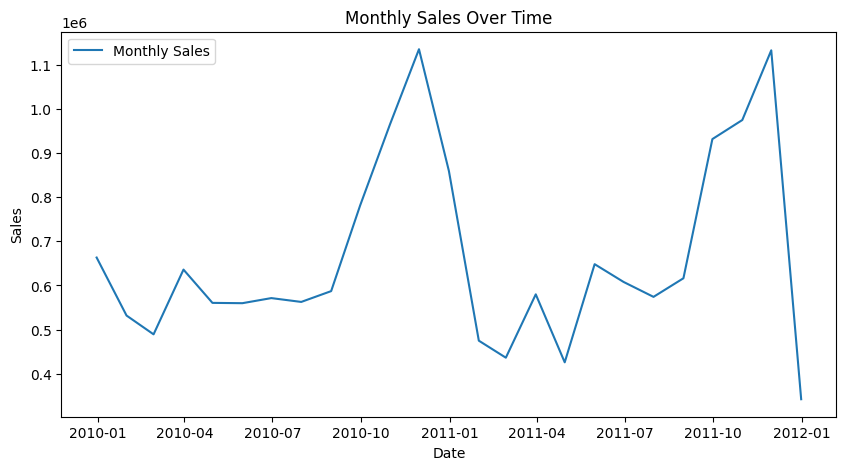

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

* When looking at monthly sales, it is seen that there is a seasonal effect. Therefore, SARIMA can be used.

	SARIMA: y(t)=g(t)+s(t)+h(t)+ϵt

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

monthly_sales_df  = monthly_sales.reset_index()

train_df, test_df = train_test_split(monthly_sales_df, test_size=0.2, shuffle=False)

train = train_df.set_index('InvoiceDate')['Sales']
test = test_df.set_index('InvoiceDate')['Sales']

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)



c:\Users\emir-\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\emir-\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\emir-\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


* Make predict

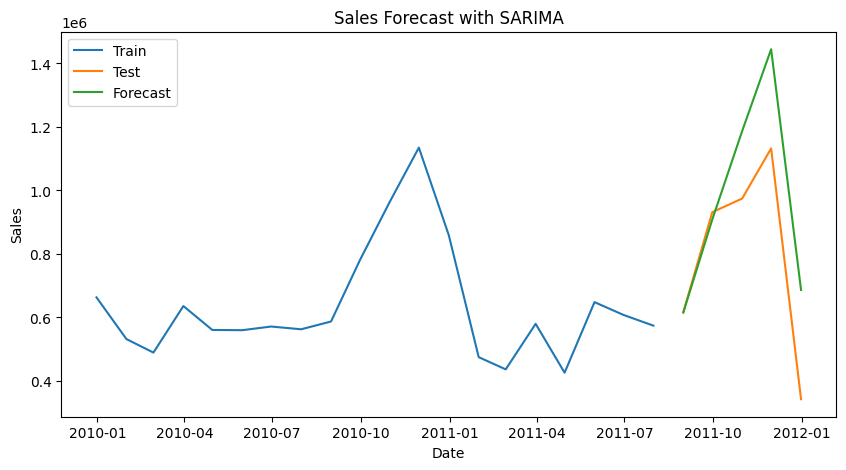

In [58]:
forecast = model_fit.forecast(steps=len(test))
forecast_series = pd.Series(forecast, index=test.index)

plt.figure(figsize=(10, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_series, label='Forecast')
plt.title('Sales Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

* Evaluate the model with RMSE and MAE

In [60]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f'Mean Absolute Percentage Error: {mape}%')


Mean Absolute Error: 178587.93274488513
Root Mean Squared Error: 228742.257290763
Mean Absolute Percentage Error: 30.488937962560392%


## Part 4

*Interpreted and presented at report.pdf and PowerBI*